In [40]:
# 케라스 토크나이저 : texts_to_matrix() 테스트
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['지바이크 지쿠터 입니다', '지쿠터 넘어졌어요', '횡단보도 조심하세요', '지쿠터 횡단보도 주차금지']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

# 'count' --> (Document-Term Matrix, DTM)을 생성, DTM에서의 인덱스는 앞코드의 word_index의 결과
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

{'지쿠터': 1, '횡단보도': 2, '지바이크': 3, '입니다': 4, '넘어졌어요': 5, '조심하세요': 6, '주차금지': 7}
[[0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1.]]
[[0.   0.33 0.   0.33 0.33 0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.5  0.   0.  ]
 [0.   0.   0.5  0.   0.   0.   0.5  0.  ]
 [0.   0.33 0.33 0.   0.   0.   0.   0.33]]
[[0.   0.69 0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.69 0.   0.   0.   1.1  0.   0.  ]
 [0.   0.   0.85 0.   0.   0.   1.1  0.  ]
 [0.   0.69 0.85 0.   0.   0.   0.   1.1 ]]


In [7]:
# 샘플 데이터 : 20개 뉴스 그룹(Twenty Newsgroups) 이메일 데이터셋
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [23]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.
print(newsdata.keys())
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))
print('첫번째 샘플의 내용 : {}'.format(newsdata.data[0])) # 첫번째 샘플 출력

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
훈련용 샘플의 개수 : 11314
총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
첫번째 샘플의 레이블 : 7
7번 레이블이 의미하는 주제 : rec.autos
첫번째 샘플의 내용 : From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the

In [29]:
# data로부터 데이터프레임을 생성하고, target 열을 추가한 뒤에 상위 5개의 행을 출력
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
print(data[:5])
data.info()

# news열은 문자열, target열은 정수형 데이터
# Null 값을 가진 샘플이 있는지 isnull().values.any() 확인
data.isnull().values.any() # False : 데이터 Null 값 없음

                                               email  target
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


False

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20
    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


<AxesSubplot:>

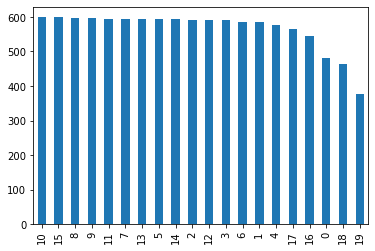

In [33]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))
print(data.groupby('target').size().reset_index(name='count'))
data['target'].value_counts().plot(kind='bar')

In [37]:
# 데이터프레임으로부터 다시 메일 본문과 레이블을 분리하고, 테스트 데이터 로딩
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target
print(test_email[0]) # 첫번째 테스트 샘플
print(test_label[0]) # 첫번째 테스트 샘플

From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler

7


In [39]:
# 케라스의 토크나이저 도구를 사용하여 전처리를 진행

vocab_size = 10000
num_classes = 20

def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

# texts_to_matrix()를 사용하여 훈련 데이터와 테스트 데이터를 'binary' 모드로 변환
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)
빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [41]:
# 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가
    print(mode+' 모드의 테스트 정확도:', score)

# 결과 분석 : 
# 대체적으로 82% ~ 83%의 비슷한 정확도가 나옴
# 하지만 'freq' 모드에서만 정확도가 69%가 나옴
# 'freq' 모드는 이번 분류에 적합한 전처리 방법이 아님

Epoch 1/5
80/80 [==============================] - 3s 27ms/step - loss: 2.2816 - accuracy: 0.3412 - val_loss: 0.9453 - val_accuracy: 0.8260
Epoch 2/5
80/80 [==============================] - 2s 23ms/step - loss: 0.8764 - accuracy: 0.7608 - val_loss: 0.4611 - val_accuracy: 0.8790
Epoch 3/5
80/80 [==============================] - 2s 23ms/step - loss: 0.4357 - accuracy: 0.8856 - val_loss: 0.3561 - val_accuracy: 0.8993
Epoch 4/5
80/80 [==============================] - 2s 23ms/step - loss: 0.2665 - accuracy: 0.9329 - val_loss: 0.3034 - val_accuracy: 0.9099
Epoch 5/5
80/80 [==============================] - 2s 23ms/step - loss: 0.1736 - accuracy: 0.9589 - val_loss: 0.2883 - val_accuracy: 0.9108
binary 모드의 테스트 정확도: 0.8285979628562927
Epoch 1/5
80/80 [==============================] - 2s 24ms/step - loss: 2.8457 - accuracy: 0.2508 - val_loss: 1.6612 - val_accuracy: 0.7473
Epoch 2/5
80/80 [==============================] - 2s 25ms/step - loss: 1.4761 - accuracy: 0.6224 - val_loss: 0.7014 - va